# TIME SERIES

# National Stock Exchange of India.

Data link https://www.kaggle.com/datasets/minatverma/nse-stocks-data/data

Long short-term memory (LSTM)-
network is a recurrent neural network (RNN), aimed to deal with the vanishing gradient problem present in traditional RNNs

# Imports (import libraries)

In [ ]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
#import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

print ("The dependancies of the work")

In [16]:
stock_df = pd.read_csv("india_NSE.csv")

In [17]:
stock_df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [18]:
nse.tail()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
846399,ZOTA,SM,221.0,221.00,214.00,217.00,217.0,220.0,14000,3041550.0,2017-12-29,14,INE358U01012
846400,ZUARI,EQ,562.0,562.00,549.55,550.80,552.0,556.8,105184,58163061.6,2017-12-29,2218,INE840M01016
846401,ZUARIGLOB,EQ,255.5,258.40,252.50,253.25,253.0,254.1,90067,22968100.6,2017-12-29,2001,INE217A01012
846402,ZYDUSWELL,EQ,1038.0,1068.00,1033.00,1043.20,1035.0,1023.1,28601,29938840.1,2017-12-29,1401,INE768C01010
846403,ZYLOG,EQ,4.3,5.15,4.30,4.65,4.6,4.4,732051,3495213.7,2017-12-29,845,INE225I01026


# Data preprocessing

In [19]:
stock_df.columns

Index(['SYMBOL', 'SERIES', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'LAST', 'PREVCLOSE',
       'TOTTRDQTY', 'TOTTRDVAL', 'TIMESTAMP', 'TOTALTRADES', 'ISIN'],
      dtype='object')

In [20]:
# convert TIMESTAMP to datetime instance
stock_df['TIMESTAMP'] = pd.to_datetime(stock_df.TIMESTAMP, dayfirst = True)
stock_df.set_index('TIMESTAMP', inplace = True)
stock_df['PER_DAILY_CHANGE'] = (stock_df.CLOSE - stock_df.OPEN)*100/stock_df.OPEN
stock_df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,PER_DAILY_CHANGE
TIMESTAMP,,,,,,,,,,,,,
2017-06-28,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,202,INE144J01027,-2.513228
2017-06-28,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,7353,INE748C01020,10.975610
2017-06-28,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,748,INE470A01017,-1.180248
2017-06-28,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,437,INE111B01023,0.000000
2017-06-28,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,1866,INE650K01021,-1.583959


In [21]:
#Lets check how many different symbols are present in the dataset
unique_symb = stock_df['SYMBOL'].unique()
print("total number of unique symbols is ", len(unique_symb))

#let's print top 10 different symbols
unique_symb[:10]

total number of unique symbols is  2037


array(['20MICRONS', '3IINFOTECH', '3MINDIA', '63MOONS', '8KMILES',
       'A2ZINFRA', 'AARTIDRUGS', 'AARTIIND', 'AARVEEDEN', 'ABAN'],
      dtype=object)

In [22]:
# total number of datapoints
stock_df.shape

(846404, 13)

846404 rows and 13 colummns

In [24]:
#say if we are interested in predicting prices of Banks only
bank_stock = stock_df[stock_df['SYMBOL'].str.contains("BANK")]
bank_stock.head(200)

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TOTALTRADES,ISIN,PER_DAILY_CHANGE
TIMESTAMP,,,,,,,,,,,,,
2017-06-28,ANDHRABANK,EQ,52.60,54.25,52.40,53.95,54.05,53.45,3191618,1.708973e+08,7202,INE434A01013,2.566540
2017-06-28,AXISBANK,EQ,493.80,500.35,490.05,492.00,496.45,492.85,12691859,6.260657e+09,76061,INE238A01034,-0.364520
2017-06-28,BANKBARODA,EQ,153.00,156.40,152.20,155.60,155.90,154.85,6999255,1.083748e+09,41604,INE028A01039,1.699346
2017-06-28,BANKBEES,EQ,2341.89,2355.72,2335.91,2354.88,2355.00,2347.31,8106,1.904236e+07,318,INF732E01078,0.554680
2017-06-28,BANKINDIA,EQ,132.00,137.65,131.35,136.75,136.55,133.55,4789755,6.463776e+08,22220,INE084A01016,3.598485
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-23,IDFCBANK,N4,7500.00,7500.00,7460.00,7495.00,7495.00,7500.00,32,2.395373e+05,13,INE092T08CF9,-0.066667
2017-01-23,IDFCBANK,N5,5156.00,5300.00,5156.00,5300.00,5300.00,5181.00,8,4.182400e+04,2,INE092T08CG7,2.792863
2017-01-23,IDFCBANK,N6,7685.00,7699.87,7685.00,7687.00,7687.00,7686.00,24,1.845315e+05,8,INE092T08CH5,0.026025


In [27]:
bank_stock.shape

(16958, 13)

In [25]:
#We need to define the columns data we are interested in predicting,
# say we want to predict the closing price of all the companies
#lets plot a pivot table

stock_pivot = bank_stock.pivot_table(values = 'CLOSE', columns = 'SYMBOL', index = 'TIMESTAMP')
stock_pivot.head()

SYMBOL,ANDHRABANK,AUBANK,AXISBANK,BANKBARODA,BANKBEES,BANKINDIA,CORPBANK,DCBBANK,DENABANK,DHANBANK,...,MYSOREBANK,ORIENTBANK,RBLBANK,RELBANK,SOUTHBANK,SYNDIBANK,UCOBANK,UNIONBANK,VIJAYABANK,YESBANK
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,66.15,NaN,449.90,159.05,1713.47,117.35,43.45,82.10,41.05,22.05,...,427.30,144.25,NaN,1840.00,19.65,89.85,45.70,150.00,34.20,732.45
2016-01-04,63.80,NaN,438.40,151.20,1672.95,114.70,42.60,79.95,40.75,22.30,...,419.45,137.45,NaN,1805.70,19.55,86.50,44.60,144.65,33.85,705.75
2016-01-05,63.55,NaN,436.45,148.10,1668.14,113.90,42.55,79.95,40.50,22.30,...,420.10,136.60,NaN,1787.00,19.95,85.45,44.70,142.95,33.95,707.70
2016-01-06,63.15,NaN,430.70,148.70,1651.24,114.25,42.20,79.90,40.40,22.05,...,423.15,134.85,NaN,1787.07,20.05,85.40,44.55,143.65,33.90,703.85
2016-01-07,60.85,NaN,409.25,139.50,1619.80,109.05,41.00,76.10,39.45,20.35,...,420.75,127.15,NaN,1750.10,19.55,81.70,42.45,135.55,33.10,678.85


In [26]:
stock_pivot.shape

(495, 29)

In [28]:
#let's drop those columns in which there are missing values
stock_pivot.dropna(axis = 1, how = 'any', inplace = True)
stock_pivot.head()

SYMBOL,ANDHRABANK,AXISBANK,BANKBARODA,BANKBEES,BANKINDIA,CORPBANK,DCBBANK,DENABANK,DHANBANK,HDFCBANK,...,KOTAKBANK,KTKBANK,MAHABANK,ORIENTBANK,SOUTHBANK,SYNDIBANK,UCOBANK,UNIONBANK,VIJAYABANK,YESBANK
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-01-01,66.15,449.90,159.05,1713.47,117.35,43.45,82.10,41.05,22.05,1193.65,...,723.625,124.80,32.25,144.25,19.65,89.85,45.70,150.00,34.20,732.45
2016-01-04,63.80,438.40,151.20,1672.95,114.70,42.60,79.95,40.75,22.30,1070.50,...,705.300,120.90,31.70,137.45,19.55,86.50,44.60,144.65,33.85,705.75
2016-01-05,63.55,436.45,148.10,1668.14,113.90,42.55,79.95,40.50,22.30,1169.20,...,707.750,119.50,32.05,136.60,19.95,85.45,44.70,142.95,33.95,707.70
2016-01-06,63.15,430.70,148.70,1651.24,114.25,42.20,79.90,40.40,22.05,1067.10,...,703.600,118.65,31.85,134.85,20.05,85.40,44.55,143.65,33.90,703.85
2016-01-07,60.85,409.25,139.50,1619.80,109.05,41.00,76.10,39.45,20.35,1056.20,...,691.650,112.95,31.15,127.15,19.55,81.70,42.45,135.55,33.10,678.85


In [30]:
stock_pivot.shape

(495, 24)

Bank is =  CORPBANK


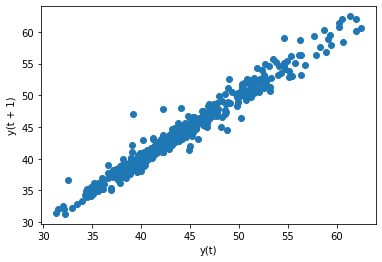

In [35]:
#most important thing in time series analysis is to have correlation between the values at different timestamp
#choose one bank at random and look for correlation using lag plot with lag value 1
np.random.seed()
bank = stock_pivot.columns.values[np.random.randint(0, len(stock_pivot.columns)+1)]
print("Bank is = ", bank)
pd.plotting.lag_plot(stock_pivot[bank])
plt.show()

As we can see in the above plot that there is strong correlation bewteen the datapoints. So, we are good to go with time series analysis on the above data

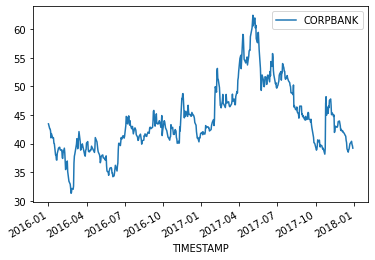

In [36]:
stock_pivot.plot(kind ='line', y = bank)
plt.show()

In [40]:
# #check for correlation using heatmap
 #plt.figure(figsize = (14,14))
# sns.heatmap(stock_pivot.corr(method='pearson'),annot=True, linewidth = 1)

The most important thing in autocorrelation analysis is to know the appropriate lag value. we can manually do that. Let's do that

In [43]:
# find appropriate lag value for the autocorrelation analysis
MAX_LAG = 30 #maximum lag value
corr = 0
lag = 1
for i in range(1, MAX_LAG):
    temp = np.abs(stock_pivot[bank].corr(stock_pivot[bank].shift(i)))
    if temp > corr:
        corr = temp
        lag = i

print("apprpriate lag value is ", lag

SyntaxError: unexpected EOF while parsing (2338327241.py, line 11)

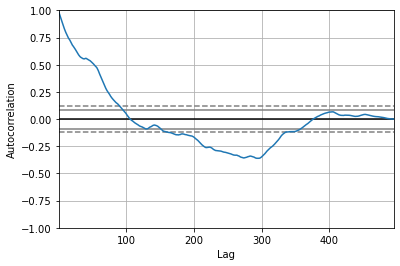

In [44]:
#Let's cross check our value using pandas autocorrelation plot
pd.plotting.autocorrelation_plot(stock_pivot[bank])
plt.show()

We can see in the above plot that the autocorrelation corresponding to lag value 1 is maximum hence shows strong correlation btwn the variable

# Check for Trend and seasonality

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

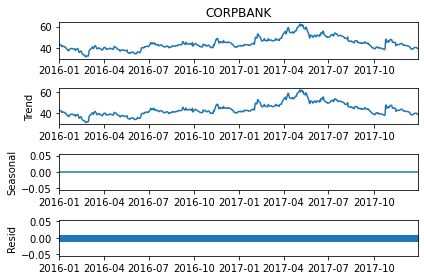

In [46]:
#seasonal decomposition using period of 1
decomposed = seasonal_decompose(stock_pivot[bank], model='additive', period = 1)

x = decomposed.plot()

In [49]:
# remove seasonality and trend
df = stock_pivot.copy()
df['STATIONARY'] = df[bank].diff()
df.STATIONARY

TIMESTAMP
2016-01-01     NaN
2016-01-04   -0.85
2016-01-05   -0.05
2016-01-06   -0.35
2016-01-07   -1.20
              ... 
2017-12-22    0.40
2017-12-26    0.45
2017-12-27   -0.55
2017-12-28   -0.20
2017-12-29   -0.45
Name: STATIONARY, Length: 495, dtype: float64

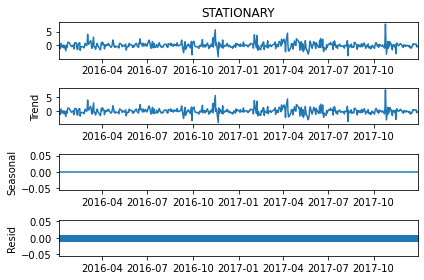

In [50]:
# Recheck for seasonality and trend
df.dropna(axis = 0, inplace = True)
decomposed = seasonal_decompose(df['STATIONARY'], model='additive', period = 1)
x = decomposed.plot()

# AR(1) Model

In [51]:
#divide data in train and test
freq = 7
X = df['STATIONARY']
Y =  X.shift(1).dropna()
Y, X
train_size = int(len(X)*0.8)
# train, test = X[1: len(X)-freq], X[len(X)-freq : ]
# train.shape, test.shape
x_train, x_test = X[0:train_size], X[train_size:len(X)-1]
y_train, y_test = Y[0:train_size], Y[train_size:]
x_train.shape, y_train.shape

((395,), (395,))

In [54]:
#AR1 equation is given by
#x_t = ϕ_{t-1} + ϵ

#find ϕ using OLS (ordinary least square)
phi = np.dot(x_train.values,y_train.values.T)/np.dot(x_train, x_train.T)
print(phi)

1.0


In [55]:
#check the prediction over test data
pred = phi*x_test
pred

TIMESTAMP
2017-08-08   -0.15
2017-08-09    1.70
2017-08-10   -3.85
2017-08-11    0.25
2017-08-14   -0.70
              ... 
2017-12-21    0.50
2017-12-22    0.40
2017-12-26    0.45
2017-12-27   -0.55
2017-12-28   -0.20
Name: STATIONARY, Length: 98, dtype: float64

In [57]:
y_test

TIMESTAMP
2017-08-09   -0.15
2017-08-10    1.70
2017-08-11   -3.85
2017-08-14    0.25
2017-08-16   -0.70
              ... 
2017-12-22    0.50
2017-12-26    0.40
2017-12-27    0.45
2017-12-28   -0.55
2017-12-29   -0.20
Name: STATIONARY, Length: 98, dtype: float64

In [60]:
#finding mean square error
import sklearn.metrics as m
r2 =m.r2_score(y_test, pred)
print("R square is ", r2)

R square is  1.0


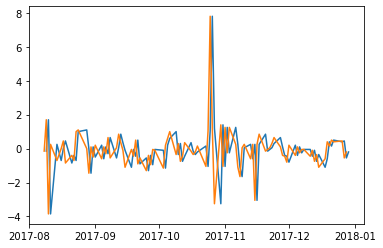

In [61]:
#let's plot the predicted vs test value
plt.plot(y_test)
plt.plot(pred)
plt.show()

As it can be seen in the above plot that we are nearly predicting the exact value as it should. it makes sense as we can see in the correlation plot that all the data points are perfectly cluttered along the diagonal

In [ ]:
END!